In [186]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import *
tf.random.set_seed(42)

In [187]:
df = pd.read_csv('bank.csv')

In [188]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [268]:
print(df.shape)
df.info()
# 3 categorical and rest numerical features. 

(10000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
CreditScore        10000 non-null int64
Gender             10000 non-null int32
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
0                  10000 non-null uint8
1                  10000 non-null uint8
2                  10000 non-null uint8
dtypes: float64(2), int32(1), int64(7), uint8(3)
memory usage: 771.6 KB


In [190]:
##Rownumber, customerid, surname will not help in predicting the customer Churning So removing theser 3 columns from feature list. 

In [191]:
df = df.drop(['RowNumber','CustomerId', 'Surname'], axis=1)

In [193]:
df.isna().sum()
# no NA values in dataset. 

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [194]:
df.Exited.value_counts()
# data seems to be skewed. 

0    7963
1    2037
Name: Exited, dtype: int64

C:\Users\Dhirender.Jit\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Dhirender.Jit\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Dhirender.Jit\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


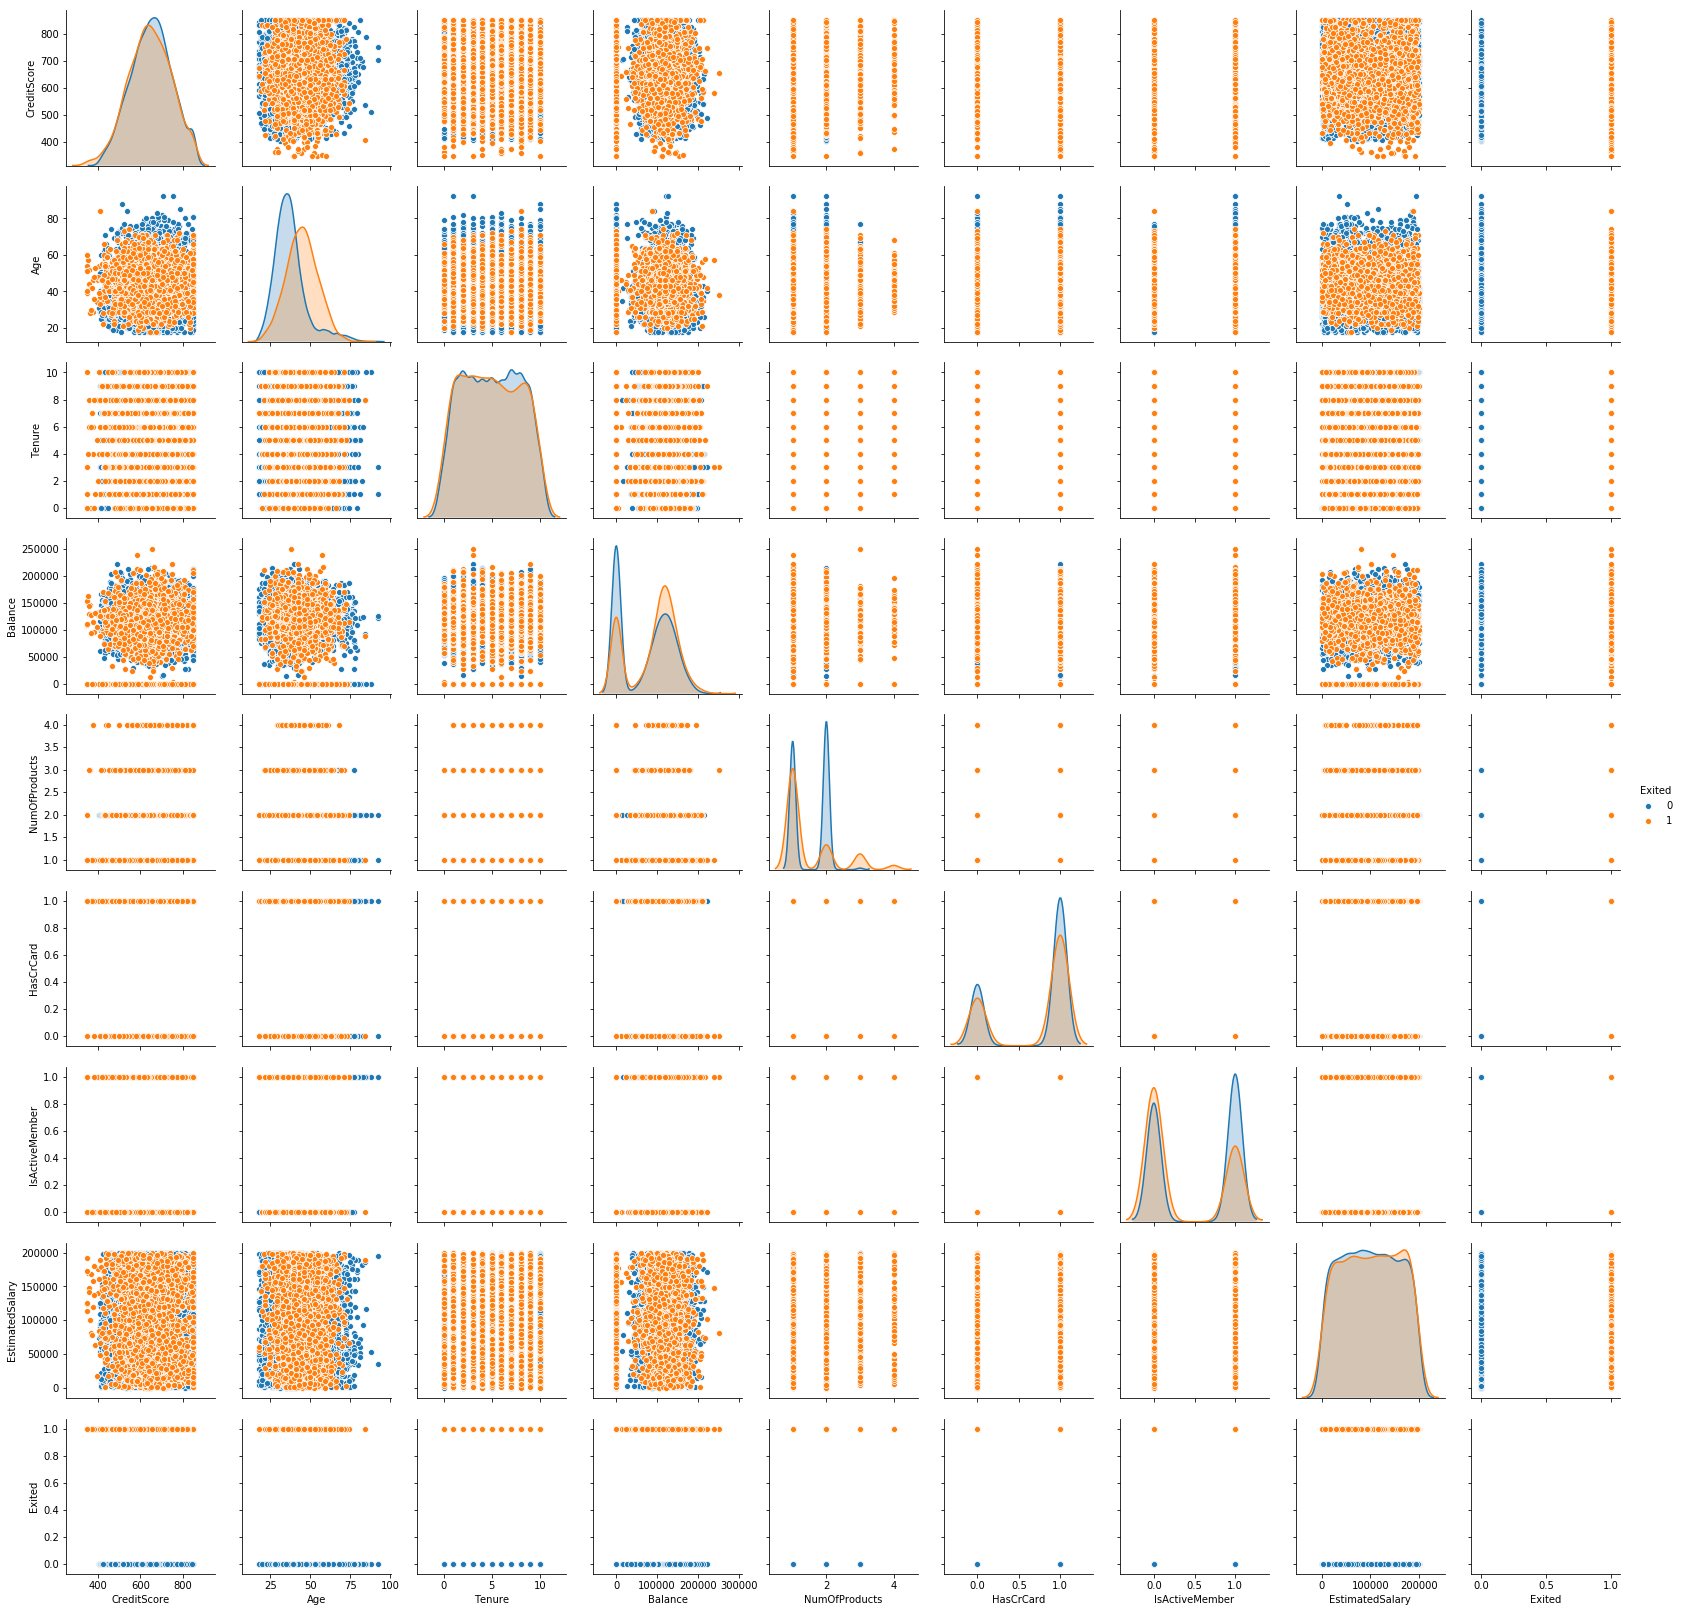

In [195]:
sns.pairplot(df, hue= 'Exited')
# if we look at diagonals of pairplot, since all distributions are overlapping on each other for output features, 
# it seems that none of the feature is helpful in predicting the output. 

C:\Users\Dhirender.Jit\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


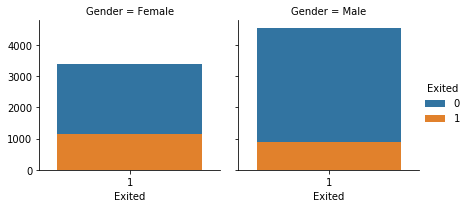

In [196]:
g = sns.FacetGrid(df, col="Gender", hue='Exited')
g = g.map(sns.countplot, "Exited")
g.add_legend()

C:\Users\Dhirender.Jit\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


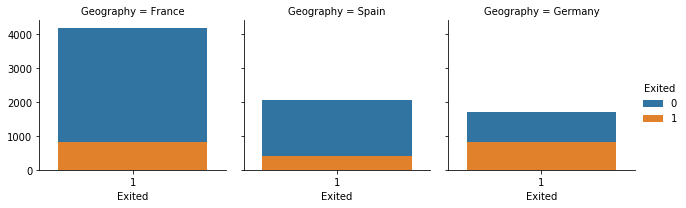

In [197]:
g = sns.FacetGrid(df, col="Geography", hue='Exited')
g = g.map(sns.countplot, "Exited")
g.add_legend()

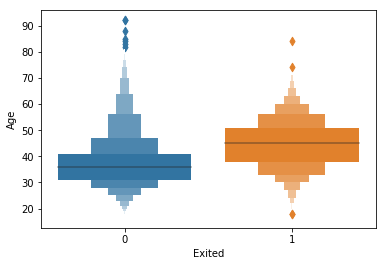

In [198]:
sns.boxenplot(df.Exited, df.Age)

In [199]:
df.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [201]:
label = LabelEncoder()
df['Geography']= label.fit_transform(df.loc[:, ['Geography']])
df['Gender']= label.fit_transform(df.loc[:, ['Gender']])
df_dummies = pd.get_dummies(df.Geography)
df = pd.concat([df, df_dummies], axis=1, sort=False)
df = df.drop('Geography', axis=1 )

C:\Users\Dhirender.Jit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dhirender.Jit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [207]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,0,1,2
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [142]:
df.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [143]:
df.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [144]:
df.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [145]:
df.Tenure.value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [208]:
X = df.drop(['Exited'], axis=1)
y= df.Exited
print(X.shape)
print(y.shape)

(10000, 12)
(10000,)


In [289]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,0,1,2
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


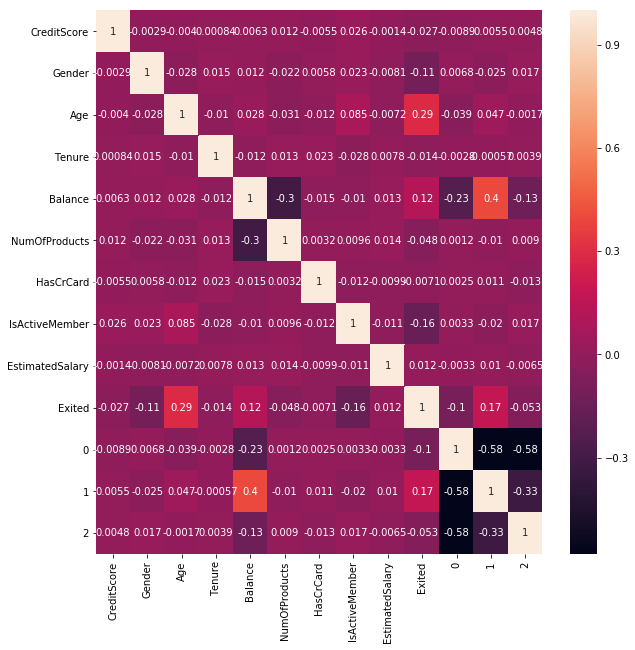

In [290]:
df_corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True)
# Good part is features are not much correlated to each other
#bad thing is features are not coorelated to output variable too. 

In [304]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 31)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train.shape)
print(y_train.shape)

(8000, 12)
(8000,)


C:\Users\Dhirender.Jit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Dhirender.Jit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Dhirender.Jit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [316]:
model = tf.keras.Sequential([
tf.keras.layers.Dense(12, activation='relu'),
tf.keras.layers.Dense(10, activation='tanh'),
tf.keras.layers.Dense(1, activation='sigmoid')])
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [317]:
model.fit(X_train, y_train, epochs=20)

Train on 8000 samples
Epoch 1/20
8000/8000 [==============================] - 0s 33us/sample - loss: 0.5360 - accuracy: 0.7635
Epoch 2/20
8000/8000 [==============================] - 0s 28us/sample - loss: 0.4674 - accuracy: 0.8012
Epoch 3/20
8000/8000 [==============================] - 0s 28us/sample - loss: 0.4504 - accuracy: 0.8034
Epoch 4/20
8000/8000 [==============================] - 0s 31us/sample - loss: 0.4402 - accuracy: 0.8083
Epoch 5/20
8000/8000 [==============================] - 0s 29us/sample - loss: 0.4329 - accuracy: 0.8110
Epoch 6/20
8000/8000 [==============================] - 0s 28us/sample - loss: 0.4270 - accuracy: 0.8139
Epoch 7/20
8000/8000 [==============================] - 0s 28us/sample - loss: 0.4222 - accuracy: 0.8138
Epoch 8/20
8000/8000 [==============================] - 0s 30us/sample - loss: 0.4181 - accuracy: 0.8144
Epoch 9/20
8000/8000 [==============================] - 0s 28us/sample - loss: 0.4144 - accuracy: 0.8155
Epoch 10/20
8000/8000 [==========

In [309]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [310]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1515   78]
 [ 229  178]]


In [311]:
print("recall score is {}".format(recall_score(y_test, y_pred)))
print("precision score is {}".format(precision_score(y_test, y_pred)))

recall score is 0.43734643734643736
precision score is 0.6953125
